In [3]:
import pandas as pd

In [2]:
# load data
scarb_1996 = pd.read_csv('data/YPData(1996-S).csv')
scarb_2001 = pd.read_csv('data/YPData(2001-S).csv')
scarb_2006 = pd.read_csv('data/YPData(2006-S).csv')
scarb_2016 = pd.read_csv('data/YPData(2016-S).csv',  encoding='latin-1')

mark_1996 = pd.read_csv('data/YPData(1996-M).csv')
mark_2001 = pd.read_csv('data/YPData(2002-M).csv')
mark_2006 = pd.read_csv('data/YPData(2006-M).csv')
mark_2016 = pd.read_csv('data/YPData(2016-M).csv')

In [4]:
def cleancols(df):
    # make everything lower case
    for i in range(len(df)):
        lower_name = str(df.loc[i,"Name"]).lower() 
        lower_cat = str(df.loc[i,"YP_Section"]).lower() 
        df.loc[i,"YP_Section"] = lower_cat

    #change rest to restaurant
        name_list = lower_name.split()
        for x in range(len(name_list)):
            word = name_list[x]
            if word.startswith("rest"):
                name_list[x] = "restaurant"
        names_fixed = " ".join(name_list).strip() #strip white spaces before and after
    
        df.loc[i,"Name"] = names_fixed #add new Name col back into df
    
    #find halal in name and change cuisine to ethnic
        if "halal" in df.loc[i,"Name"]:
            df.loc[i,"Cuisine"] = "ethnic"
        
    # make all NaN in cuisine into not south asian
        cuis = df.loc[i,"Cuisine"]
        if pd.isnull(cuis):
            df.loc[i,"Cuisine"] = "Not South Asian"
        
    # seperate address number, st name, st type, and direction (e, n, s, w)
        full_address = str(df.loc[i,"Address"]).lower() 
        df.loc[i,"Address"] = full_address
        add_list = full_address.split()
        full_list = full_address.split()
    
        st_no = full_list[0]
        if st_no.isnumeric():
            df.loc[i,"st_no"] = st_no
            del add_list[0]
        
        last = full_list[-1]
        if (last == 'e') or (last == 'w') or (last == 'n') or (last == 's'):
            df.loc[i,"compass_direction"] = last
            del add_list[-1]
    
        last = full_list[-1]
        if (last == 'av') or (last == 'pl') or (last == 'blvd')  or (last == 'tr') or (last == 'trl') or (last == 'bl') or (last == 'cr') or (last == 'ln') or (last == 'ave') or (last == 'cir') or (last == 'rd') or (last == 'pkwy') or (last == 'crt') or (last == 'sq') or (last == 'dr') or (last == 'crt') or (last == 'ct') or (last == 'st'):
            df.loc[i,"st_type"] = last
            del add_list[-1]
        
        last = add_list[-1]
        if (last == 'av') or (last == 'pl') or (last == 'blvd')  or (last == 'tr') or (last == 'trl') or (last == 'bl') or (last == 'cr') or (last == 'ln') or (last == 'ave') or (last == 'cir') or (last == 'rd') or (last == 'pkwy') or (last == 'crt') or (last == 'sq') or (last == 'dr') or (last == 'crt') or (last == 'ct') or (last == 'st'):
            df.loc[i,"st_type"] = last
            del add_list[-1]
        
        stadd_fixed = " ".join(add_list).strip()
        df.loc[i,"st_name"] = stadd_fixed
        
        if "hwy" in stadd_fixed:
            df.loc[i,"st_type"] = "hwy"
    

In [5]:
cleancols(scarb_1996)
cleancols(scarb_2001)
cleancols(scarb_2006)
cleancols(scarb_2016)

cleancols(mark_1996)
cleancols(mark_2001)
cleancols(mark_2006)
cleancols(mark_2016)

In [6]:
def within_fill(df):

    namelist = df[df['st_type'] == 'na']['st_name'].unique()
    namedict = dict((el, '') for el in namelist)

    for i in range(len(df)):
        dfname = df.loc[i,"st_name"]
        dftype = df.loc[i,"st_type"]
    
        if (dfname in namelist) and (dftype != "na"):
            namedict[dfname] = dftype
        
    for i in range(len(df)):
        dfname = df.loc[i,"st_name"]    
        if dfname in namedict:
            df.loc[i,"st_type"] = namedict[dfname]

In [7]:
within_fill(scarb_1996)
within_fill(scarb_2001)
within_fill(scarb_2006)
within_fill(scarb_2016)

within_fill(mark_1996)
within_fill(mark_2001)
within_fill(mark_2006)
within_fill(mark_2016)

In [8]:
# fill in a st names

#two dataframs, if st_type is same and na for one and full from another, fill the na
def fill_types(dfi, dfj):

    for i in range(len(dfi)):
        for j in range(len(dfj)):
            namei = dfi.loc[i,"st_name"]
            namej = dfj.loc[j,"st_name"]
            typei = dfi.loc[i,"st_type"]
            typej = dfj.loc[j,"st_type"]
        
            if namei == namej and typei == ''and typej != '':
                dfi.loc[i, "st_type"] = typej
            
            if namei == namej and typej == '' and typei != '':
                dfj.loc[i, "st_type"] = typei


In [9]:
fill_types(scarb_1996, scarb_2001)
fill_types(scarb_2006, scarb_2001)
fill_types(scarb_2006, scarb_2016)

In [10]:
fill_types(mark_1996, mark_2001)
fill_types(mark_2001, mark_2006)
fill_types(mark_2016, mark_2006)

In [11]:
fill_types(mark_2001, scarb_2001)
fill_types(mark_1996, scarb_1996)
fill_types(mark_2006, scarb_2006)
fill_types(mark_2016, scarb_2016)

In [12]:
fill_types(mark_2001, scarb_2006)
fill_types(mark_2001, scarb_1996)
fill_types(mark_2001, scarb_2016)

fill_types(mark_1996, scarb_2006)
fill_types(mark_1996, scarb_2001)
fill_types(mark_1996, scarb_2016)

fill_types(mark_2006, scarb_1996)
fill_types(mark_2006, scarb_2001)
fill_types(mark_2006, scarb_2016)

fill_types(mark_2016, scarb_1996)
fill_types(mark_2016, scarb_2001)
fill_types(mark_2016, scarb_2006)

KeyboardInterrupt: 

In [ ]:
#merge df

df = pd.concat([scarb_1996, scarb_2001, scarb_2006, scarb_2016, mark_1996, mark_2001, mark_2006, mark_2016])
df.drop(columns = 'Unnamed: 6', inplace = True)

df.drop(531, inplace = True) #drop nan 
df["Year"] = df["Year"].astype(int).astype(str) #make year col into a str

# check for duplicates of name and address and year
df.drop_duplicates(subset = ["Name", "Address", "Year"], inplace = True)

df.reset_index(inplace = True, drop = True)

In [ ]:
#manual fill
# Cuisine: 5
# st_type: 9

df.iloc[12, 9] = 'rd' #westney
df.iloc[171, 9] = 'rd' #dovercourt

df.iloc[508,5] = "Not South Asian"
df.iloc[508, 9] = 'st' #dufferin

df.iloc[550,5] = "Not South Asian"
df.iloc[550, 9] = 'st'
df.iloc[550,8] = "main"

df.iloc[1098, 9] = 'rd' #dovercourt

df.iloc[2373, 9] = 'st' #market

df.iloc[2544, 9] = 'st' #charles

df.iloc[3216, 9] = 'ave' #donlands

df.iloc[3222, 9] = 'st' #charles

df.iloc[3249, 9] = 'st' #dupont

df.iloc[3324, 9] = 'blvd' #woodbine downs

df.iloc[3410, 9] = 'rd' #oak

df.iloc[3451, 9] = 'st' #hayden

df.iloc[3454, 9] = 'ave' #signal hill

df.iloc[3630, 9] = 'ave' #centre

df.iloc[3732, 9] = 'rd' #westney

df.iloc[3754, 9] = 'st' #elson 

df.iloc[4023, 9] = 'st' #elson 

df.iloc[4027, 9] = 'rd' #don park 

df.iloc[4050, 9] = 'av' #danforth
df.iloc[4050, 8] = 'danforth'

df.iloc[4176, 9] = 'st' #elson

df.iloc[4409, 9] = 'st' #elson

df.iloc[4561, 9] = 'st' #elson

df.iloc[4712, 9] = 'rd' #hood

df.iloc[4808, 9] = 'st' #elson

df.iloc[4825, 9] = 'hwy' #hwy 7 
df.iloc[4825, 8] = 'hwy 7'

#change all av to ave
for i in range(len(df)):
    st_type = df.loc[i,'st_type']
    if st_type == 'av':
        df.loc[i,'st_type'] = 'ave'

In [ ]:
df.loc[(df['Cuisine'] != 'Not South Asian')] ['st_name'].unique()


for i in range(len(df)):
    name = df.loc[i,'st_name']
    if name == 'eglinotn':
        df.loc[i,'st_type'] = 'eglinton'
        
    if name == 'yongu':
        df.loc[i,'st_type'] = 'yonge'
        
    if name == 'throncliffe park':
        df.loc[i,'st_type'] = 'thorncliffe park'
        
    if name == 'dudnas':
        df.loc[i,'st_type'] = 'thorncliffe park'

In [ ]:
# find unique cuisines and clean if any discrepancies
df['Cuisine'].unique()

for i in range(len(df)):
    cuis = str(df.loc[i,'Cuisine'].lower())
    
    if cuis == 'india':
        df.loc[i,'Cuisine'] = 'indian'
        
    if cuis == '"oriental & canadian foods"':
        df.loc[i,'Cuisine'] = 'ethnic'
    
    if cuis == '"east & west indian"':
        df.loc[i,'Cuisine'] = 'ethnic'
        
    if cuis == 'ethinc':
        df.loc[i,'Cuisine'] = 'ethnic'
        
    if cuis == 'bbq':
        df.loc[i,'Cuisine'] = 'not south asian'

    
    if cuis == 'chinese':
        df.loc[i,'Cuisine'] = 'not south asian'

    
    if cuis == 'caribbean' :
         df.loc[i,'Cuisine'] = 'not south asian'

    
    if cuis == 'hungarian':
        df.loc[i,'Cuisine'] = 'not south asian'
        
    if cuis == 'pakistan':
        df.loc[i,'Cuisine'] = 'pakistani'    
        
    if cuis == 'sri lanka':
        df.loc[i,'Cuisine'] = 'sri lankan'  
        
    if cuis == 'south aisan':
        df.loc[i,'Cuisine'] = 'south asian'

df['Cuisine'].unique()


In [ ]:
# add state column
df["Prov"] = "ON"

# add country column
df["Country"] = "CA"


df["Full_Address"] = df['st_no'] + ' ' + df['st_name'] + ' ' + df['st_type'] + ', ' + df['City'] + ', ON, CA'

# check data types before exporting
df.dtypes

In [ ]:
#export to geocode in ArcGIS Pro

#df.to_csv("nonspatial.csv")

## Investigate geolocated matches

In [3]:
import geopandas as gpd

In [4]:
#import after data was geocoded in ArcGIS Pro

gdf = gpd.read_file('data/yp_geocoded.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [21]:
gdf.head()

,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,USER_Addre,USER_Cuisi,USER_st_no,USER_compa,USER_st_na,USER_st_ty,USER_Prov,USER_Count,USER_Full_,geometry
0,World,M,100.00,A,"357 Pitfield Rd, Scarborough, Ontario, M1S 3E5","357 Pitfield Rd, Toronto, ON, M1S 3E5, CAN",357 Pitfield Rd,PointAddress,None,None,...,357 pitfield,ethnic,357.0,n,pitfield,rd,ON,CA,"357 pitfield rd, Scarborough, ON, CA",POINT (-79.25789 43.78717)
1,World,M,99.58,A,"1879 Lawrence Ave E, Scarborough, Ontario, M1R...","1879 Lawrence Ave E, Toronto, ON, M1R 2Y3, CAN",1879 Lawrence Ave E,PointAddress,None,None,...,1879 lawrence av e,ethnic,1879.0,e,lawrence,ave,ON,CA,"1879 lawrence ave, Scarborough, ON, CA",POINT (-79.30181 43.74360)
2,World,M,99.58,A,"4915 Steeles Ave E, Scarborough, Ontario, M1V 4Z4","4915 Steeles Ave E, Toronto, ON, M1V 4Z4, CAN",4915 Steeles Ave E,PointAddress,None,None,...,4915 steeles e,Not South Asian,4915.0,e,steeles,ave,ON,CA,"4915 steeles ave, Scarborough, ON, CA",POINT (-79.29117 43.82716)
3,World,M,98.29,A,"1357 Danforth Rd, Scarborough, Ontario, M1J 1G7","1357 Danforth Rd, Toronto, ON, M1J 1G7, CAN",1357 Danforth Rd,PointAddress,None,None,...,1357 danforth rd,Not South Asian,1357.0,n,danforth,ave,ON,CA,"1357 danforth ave, Scarborough, ON, CA",POINT (-79.24438 43.74395)
4,World,M,100.00,A,"267 Morningside Ave, Scarborough, Ontario, M1E...","267 Morningside Ave, Toronto, ON, M1E 3G1, CAN",267 Morningside Ave,PointAddress,None,None,...,267 morningside,ethnic,267.0,n,morningside,ave,ON,CA,"267 morningside ave, Scarborough, ON, CA",POINT (-79.18640 43.76982)


In [22]:
gdf['Status'].unique() #no unmatched locations

array(['M', 'T'], dtype=object)

In [23]:
gdf[gdf['Status'] == 'T'].head() #all still have geometries

,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,USER_Addre,USER_Cuisi,USER_st_no,USER_compa,USER_st_na,USER_st_ty,USER_Prov,USER_Count,USER_Full_,geometry
40,World,T,84.00,A,"Scarborough, Toronto, Ontario","Scarborough, Toronto, ON, CAN",Scarborough,Locality,Neighborhood,Scarborough,...,2349 haines,Not South Asian,2349.0,n,haines,None,ON,CA,"2349 haines , Scarborough, ON, CA",POINT (-79.25761 43.77296)
144,World,T,88.37,A,"Finch Ave E, Scarborough, Ontario, M1W 4C1","Finch Ave E, Scarborough, ON, M1W 4C1, CAN",Finch Ave E,StreetName,None,None,...,1111 finch w,Not South Asian,1111.0,w,finch,st,ON,CA,"1111 finch st, Scarborough, ON, CA",POINT (-79.32079 43.79551)
156,World,T,87.27,A,"Scarborough, Toronto, Ontario","Scarborough, Toronto, ON, CAN",Scarborough,Locality,Neighborhood,Scarborough,...,20 orfus,Not South Asian,20.0,n,orfus,None,ON,CA,"20 orfus , Scarborough, ON, CA",POINT (-79.25761 43.77296)
167,World,T,85.00,A,"Scarborough, Toronto, Ontario","Scarborough, Toronto, ON, CAN",Scarborough,Locality,Neighborhood,Scarborough,...,614 jarvis,Not South Asian,614.0,n,jarvis,None,ON,CA,"614 jarvis , Scarborough, ON, CA",POINT (-79.25761 43.77296)
185,World,T,88.57,A,"Scarborough, Toronto, Ontario","Scarborough, Toronto, ON, CAN",Scarborough,Locality,Neighborhood,Scarborough,...,nan,Not South Asian,NaN,n,nan,None,ON,CA,"nan nan , Scarborough, ON, CA",POINT (-79.25761 43.77296)


In [24]:
gdf.loc[gdf['Status'] == 'T', 'USER_Cuisi'].value_counts()

USER_Cuisi
Not South Asian    712
indian               8
ethnic               8
south asian          6
Indian               1
South Asian          1
Bangladeshi          1
pakistani            1
Name: count, dtype: int64

In [25]:
gdf.loc[gdf['Status'] == 'T', 'USER_Cuisi'].value_counts()

USER_Cuisi
Not South Asian    712
indian               8
ethnic               8
south asian          6
Indian               1
South Asian          1
Bangladeshi          1
pakistani            1
Name: count, dtype: int64

<Axes: >

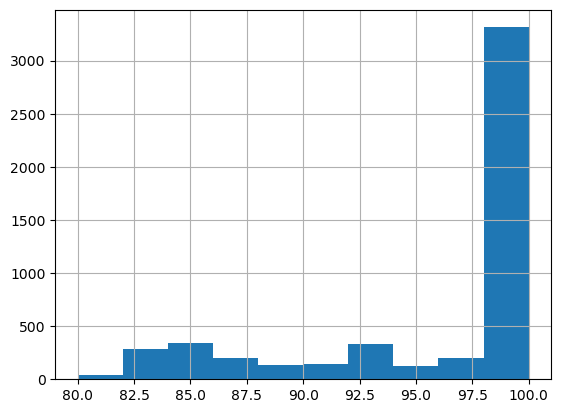

In [26]:
gdf['Score'].hist()

In [6]:
gdf['Score'].describe()

count    5119.000000
mean       95.839355
std         5.774358
min        80.000000
25%        93.100000
50%        98.720000
75%       100.000000
max       100.000000
Name: Score, dtype: float64

<Axes: >

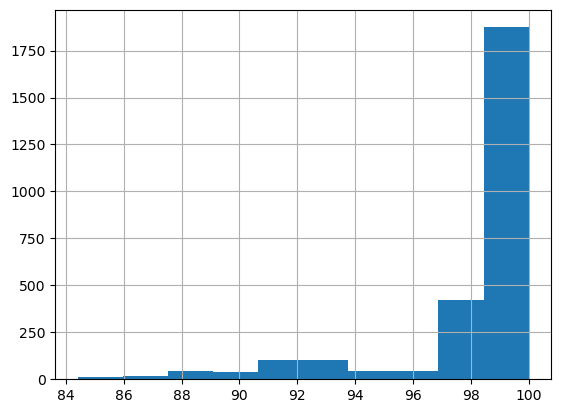

In [27]:
gdf.loc[gdf["City"] == "Scarborough",'Score'].hist()

<Axes: >

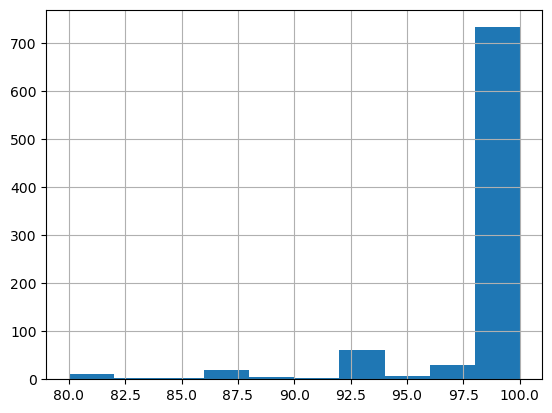

In [28]:
gdf.loc[gdf["City"] == "Markham",'Score'].hist()

<Axes: xlabel='City'>

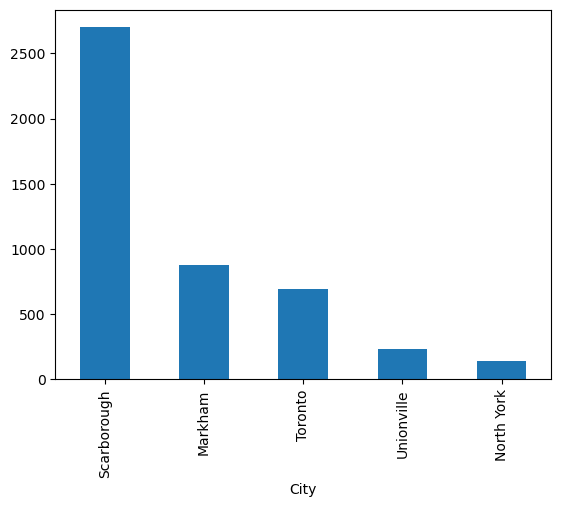

In [29]:
gdf['City'].value_counts().head().plot.bar() #Most are in scarborough and markham

In [30]:
rename_dict = {'Match_addr': 'addr',
              'USER_Year' : "year",
              'USER_YP_Se' : "YP_sect",
 'USER_Name' : "name",
 'USER_Cuisi' : "cuisine"}

df = gdf[['Match_addr', 'City', 'X', 'Y', 'Score', 'USER_Year',
 'USER_YP_Se',
 'USER_Name',
 'USER_Cuisi',
 'geometry']].rename(columns = rename_dict)

for i in range(len(df)):
    cuis = str(df.loc[i,'cuisine'].lower())
    df.loc[i,'cuisine'] = cuis
    
list(df)

['addr',
 'City',
 'X',
 'Y',
 'Score',
 'year',
 'YP_sect',
 'name',
 'cuisine',
 'geometry']

In [31]:
# find same rest over different years

df = df.drop([2157, 2159, 2909, 3413])

# 2027 change address to 3745
df.loc[2027, 'addr'] = df.loc[3745, 'addr']
df.loc[2027, 'City'] = df.loc[3745, 'City']
df.loc[2027, 'X'] = df.loc[3745, 'X']
df.loc[2027, 'Y'] = df.loc[3745, 'Y']
df.loc[2027, 'Score'] = df.loc[3745, 'Score']
df.loc[2027, 'geometry'] = df.loc[3745, 'geometry']

# 1763 change address to 1105
df.loc[1763, 'addr'] = df.loc[1105, 'addr']
df.loc[1763, 'City'] = df.loc[1105, 'City']
df.loc[1763, 'X'] = df.loc[1105, 'X']
df.loc[1763, 'Y'] = df.loc[1105, 'Y']
df.loc[1763, 'Score'] = df.loc[1105, 'Score']
df.loc[1763, 'geometry'] = df.loc[1105, 'geometry']

df.reset_index(inplace = True, drop = True)

for i in range(len(df)):
    name = df.loc[i, 'name']
    
#if ali baba then cuisne is not south asian 
    if "ali baba" in name:
        df.loc[i, 'cuisine'] = 'not south asian'


#anjappar chettinad restaurant south asian
    if "anjappar chettinad" in name:
        df.loc[i, 'cuisine'] = 'south asian'

#apsharas restaurant ethnic
    if "apsharas" in name:
        df.loc[i, 'cuisine'] = 'ethnic'

# bombay bazaar indian
    if "bombay" in name:
        df.loc[i, 'cuisine'] = 'indian'

# saravana's market ethnic
    if "saravana" in name:
        df.loc[i, 'cuisine'] = 'ethnic'

# super bazar south asian
    if "super bazar" in name:
        df.loc[i, 'cuisine'] = 'south asian'

# new kalyani supermarket sri lankan
    if "new kalyani" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        
# rashnaa sri lankan
    if "rashnaa" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'

# hopper sri lankan
    if "hopper" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        
# five star sri lankan
    if "five star" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        
# sp importers sri lankan
    if "p importers" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        
# serendib sri lankan
    if "serendib" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        
# rajahram sri lankan
    if "rajahram" in name:
        df.loc[i, 'cuisine'] = 'sri lankan'

# ohmsiva trading south asian
    if "ohmsiva trading" in name:
        df.loc[i, 'cuisine'] = 'south asian'
    
    if 'colombo' in name:
        df.loc[i, 'cuisine'] = 'sri lankan'
        

        
#fill in retailers that exist for skipped periods
new_row = {'addr' : df.iloc[1119, 0],
 'City' : df.iloc[1119, 1],
 'X' : df.iloc[1119, 2],
 'Y' : df.iloc[1119, 3],
 'Score' : df.iloc[1119, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[1119, 6],
 'name' : df.iloc[1119, 7],
 'cuisine' : df.iloc[1119, 8],
 'geometry' : df.iloc[1119, 9]} 

df.loc[len(df)] = new_row 

new_row = {'addr' : df.iloc[1140, 0],
 'City' : df.iloc[1140, 1],
 'X' : df.iloc[1140, 2],
 'Y' : df.iloc[1140, 3],
 'Score' : df.iloc[1140, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[1140, 6],
 'name' : df.iloc[1140, 7],
 'cuisine' : df.iloc[1140, 8],
 'geometry' : df.iloc[1140, 9]} 

df.loc[len(df)] = new_row

new_row = {'addr' : df.iloc[1953, 0],
 'City' : df.iloc[1953, 1],
 'X' : df.iloc[1953, 2],
 'Y' : df.iloc[1953, 3],
 'Score' : df.iloc[1953, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[1953, 6],
 'name' : df.iloc[1953, 7],
 'cuisine' : df.iloc[1953, 8],
 'geometry' : df.iloc[1953, 9]} 

df.loc[len(df)] = new_row 

new_row = {'addr' : df.iloc[1988, 0],
 'City' : df.iloc[1988, 1],
 'X' : df.iloc[1988, 2],
 'Y' : df.iloc[1988, 3],
 'Score' : df.iloc[1988, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[1988, 6],
 'name' : df.iloc[1988, 7],
 'cuisine' : df.iloc[1988, 8],
 'geometry' : df.iloc[1988, 9]} 

df.loc[len(df)] = new_row  

new_row = {'addr' : df.iloc[2027, 0],
 'City' : df.iloc[2027, 1],
 'X' : df.iloc[2027, 2],
 'Y' : df.iloc[2027, 3],
 'Score' : df.iloc[2027, 4],
 'year' : '2006',
 'YP_sect' : df.iloc[2027, 6],
 'name' : df.iloc[2027, 7],
 'cuisine' : df.iloc[2027, 8],
 'geometry' : df.iloc[2027, 9]} 

df.loc[len(df)] = new_row 

new_row = {'addr' : df.iloc[2027, 0],
 'City' : df.iloc[2027, 1],
 'X' : df.iloc[2027, 2],
 'Y' : df.iloc[2027, 3],
 'Score' : df.iloc[2027, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[2027, 6],
 'name' : df.iloc[2027, 7],
 'cuisine' : df.iloc[2027, 8],
 'geometry' : df.iloc[2027, 9]} 

df.loc[len(df)] = new_row 

new_row = {'addr' : df.iloc[1820, 0],
 'City' : df.iloc[1820, 1],
 'X' : df.iloc[1820, 2],
 'Y' : df.iloc[1820, 3],
 'Score' : df.iloc[1820, 4],
 'year' : '2001',
 'YP_sect' : df.iloc[1820, 6],
 'name' : df.iloc[1820, 7],
 'cuisine' : df.iloc[1820, 8],
 'geometry' : df.iloc[1820, 9]} 

df.loc[len(df)] = new_row

df = df.drop(1039) #duplicate


In [32]:
df.crs #wgs 84

In [33]:
#save to use in analysis
df.to_file('spatial_YP.geojson', driver='GeoJSON')  